# Gradient descent demonstration

In this notebook I am going to demonstrate how the gradient descent optimization algorithm works.

I will use a linear regression model as an example model.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

First, let's generate some data for our model with a linear function.

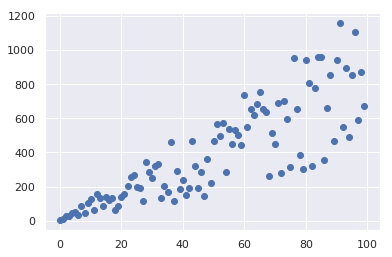

In [11]:
sns.set()
N = 100

def f(x):
    return 3*x + 2 + 10*x*np.random.random()


# generating the dataset
X = [x for x in range(N)]
y = [f(x) for x in X]

plt.scatter(X, y)
plt.show()

After generating the model, we can start to think about gradient descent.

The goal of linear regression is to find a ```slope``` and an ```intercept``` which satisfies the equation:

\begin{align}
\textbf{Y} = a\textbf{X} + b
\end{align}

Where ```a``` is the slope, ```b``` is the intercept as real numbers, ```Y``` is the target, and ```X``` is the input vector or matrix.  

Since satisfying this equation is impossible because of the irreducible error, the linear regression tries to find ```a``` and ```b``` such that the ```MSE = mean squared error```, or in this case the loss function is minimized.

\begin{align}
\textbf{MSE} = \frac{1}{N}\sum_{i=1}^N{(y_i - \hat{y})^2}
\end{align}

We can substutue in the linear equation:

\begin{align}
\textbf{MSE} = \frac{1}{N}\sum_{i=1}^N{(y_i - (a\textbf{X} + b))^2}
\end{align}